In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='Times New Roman', size=14)
# plt.figure(figsize=(6,3))
# Replace with your log file path
log_file_path = "/home/tongping/mingcan/github/Pruning/TreeMTL/outputs/unity/backup_unity/resnet34_accuracy_sparsity/baseline_minus15_decay0.00005_weighted_loss_sliding_windows/events.out.tfevents.1678500354.gypsum-gpu182.683343.0"


In [ ]:
# List your desired tags
desired_tags = ['LR/normal/weights', 'LR/segment_semantic/weights', 'LR/depth_zbuffer/weights']
# desired_tags = ['sparsity/Backbone', 'sparsity/Dep', 'sparsity/Nor', 'sparsity/Seg', 'sparsity/overall_sparsity']

# Read the log file
scalars = {}
for e in tf.compat.v1.train.summary_iterator(log_file_path):
    for v in e.summary.value:
        if v.tag in desired_tags:
            if v.tag not in scalars:
                scalars[v.tag] = []
            value = v.simple_value
            if v.tag == 'sparsity/overall_sparsity':
                value *= 100
            scalars[v.tag].append((e.step, value))


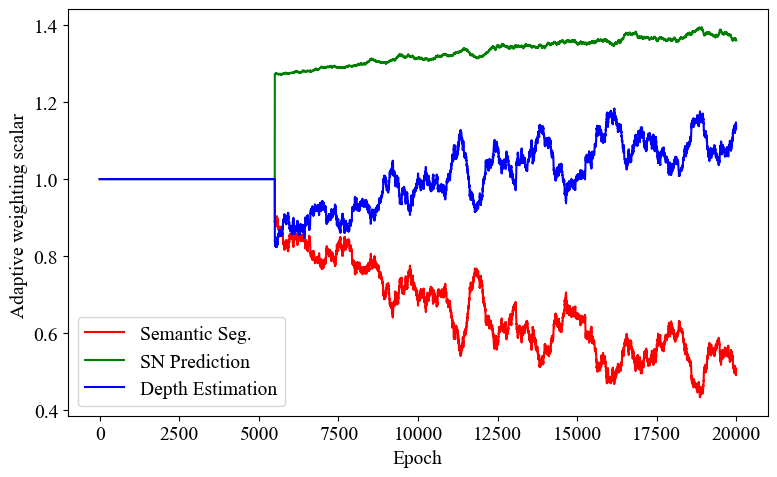

In [ ]:
import matplotlib.pyplot as plt



def create_combined_figure(scalars):
    combined_fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
    for tag, values in scalars.items():
        steps, data = zip(*values)
        if tag == 'LR/normal/weights':
            color = 'g'
            tag = 'SN Prediction'
            data = [(i+1.2) if i != 1 else i for i in data]
        elif tag == 'LR/segment_semantic/weights':
            color = 'r'
            tag = 'Semantic Seg.'
            data = [(i-1) if i != 1 else i for i in data]

        elif tag == 'LR/depth_zbuffer/weights':
            color = 'b'
            tag = 'Depth Estimation'
            data = [(i-0.2) if i != 1 else i for i in data]
        
        ax.plot(steps, data, label=tag, color=color)

    ax.legend()
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Adaptive weight')
    plt.tight_layout()

    return combined_fig

combined_figure = create_combined_figure(scalars)

plt.savefig('weighting_scalar.pdf')
plt.show()

